In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


In [186]:
def preproc(path_to_files, postfix='', ts_start=6):
    df_results = pd.read_csv(path_to_files + f'results{postfix}.csv')
    df_cpu_results = pd.read_csv(path_to_files + f'results_cpu{postfix}.csv')
    df_results['ts'] = pd.to_datetime(df_results.label.str[ts_start:ts_start+10])
    df_cpu_results['ts'] = pd.to_datetime(df_cpu_results.label.str[ts_start:ts_start+10])
    return df_results, df_cpu_results


In [187]:
df_local, df_local_cpu = preproc('../local/results/')
df_cloud, df_cloud_cpu = preproc('../cloud/results/', '_cloud')
df_containerized, df_containerized_cpu = preproc('../containerized/results/', '_containerized', 14)
df_vertex, df_vertex_cpu = preproc('../vertex/results/', '_vertex', 7)


In [188]:
df_containerized_boost = df_containerized[df_containerized.label.apply(lambda x: x[-5:])=='boost'].reset_index()
df_containerized = df_containerized[df_containerized.label.apply(lambda x: x[-5:]!='boost')]
df_containerized_cpu_boost = df_containerized_cpu[df_containerized_cpu.label.apply(lambda x: x[-5:])=='boost'].reset_index()
df_containerized_cpu = df_containerized_cpu[df_containerized_cpu.label.apply(lambda x: x[-5:]!='boost')]

df_vertex_boost = df_vertex[df_vertex.label.apply(lambda x: x[-5:])=='boost'].reset_index()
df_vertex = df_vertex[df_vertex.label.apply(lambda x: x[-5:]!='boost')]
df_vertex_cpu_boost = df_vertex_cpu[df_vertex_cpu.label.apply(lambda x: x[-5:])=='boost'].reset_index()
df_vertex_cpu = df_vertex_cpu[df_vertex_cpu.label.apply(lambda x: x[-5:]!='boost')]



In [121]:
def visualize(variable, title, unit, cpu=False, boost=False):
    plt.figure(figsize=(14,8))
    plt.style.use('ggplot')
    ax = plt.axes()

    if not boost:
        if cpu:
            ax.plot(df_local_cpu.index, df_local_cpu[f'{variable}'])
            ax.plot(df_cloud_cpu.index, df_cloud_cpu[f'{variable}'])
            ax.plot(df_containerized_cpu.index, df_containerized_cpu[f'{variable}'])
            ax.plot(df_vertex_cpu.index, df_vertex_cpu[f'{variable}'])
        else:
            ax.plot(df_local.index, df_local[f'{variable}'])
            ax.plot(df_cloud.index, df_cloud[f'{variable}'])
            ax.plot(df_containerized.index, df_containerized[f'{variable}'])
            ax.plot(df_vertex.index, df_vertex[f'{variable}'])
        ax.legend(['local', 'cloud', 'containerized', 'vertex'], bbox_to_anchor=(1.15,1))
    else:
        if cpu:
            ax.plot(df_local_cpu.index, df_local_cpu[f'{variable}'])
            ax.plot(df_cloud_cpu.index, df_cloud_cpu[f'{variable}'])
            ax.plot(df_containerized_cpu.index, df_containerized_cpu[f'{variable}'])
            ax.plot(df_vertex_cpu.index, df_vertex_cpu[f'{variable}'])
            ax.plot(df_containerized_cpu_boost.index, df_containerized_cpu_boost[f'{variable}'])
            ax.plot(df_vertex_cpu_boost.index, df_vertex_cpu_boost[f'{variable}'])
        else:
            ax.plot(df_local.index, df_local[f'{variable}'])
            ax.plot(df_cloud.index, df_cloud[f'{variable}'])
            ax.plot(df_containerized.index, df_containerized[f'{variable}'])
            ax.plot(df_vertex.index, df_vertex[f'{variable}'])
            ax.plot(df_containerized_boost.index, df_containerized_boost[f'{variable}'])
            ax.plot(df_vertex_boost.index, df_vertex_boost[f'{variable}'])
        ax.legend(['local', 'cloud', 'containerized', 'vertex', 'containerized_boost', 'vertex_boost'], bbox_to_anchor=(1,1))
    ax.set_title(f'{title}')
    ax.set_xlabel('iteration')
    ax.set_ylabel(f'{unit}')
    plt.show()


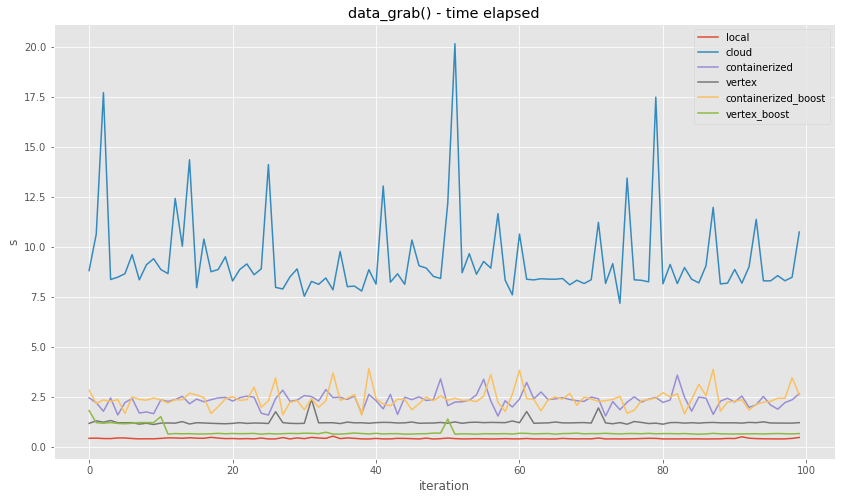

In [194]:
visualize('data_time', 'data_grab() - time elapsed', 's', boost=True)

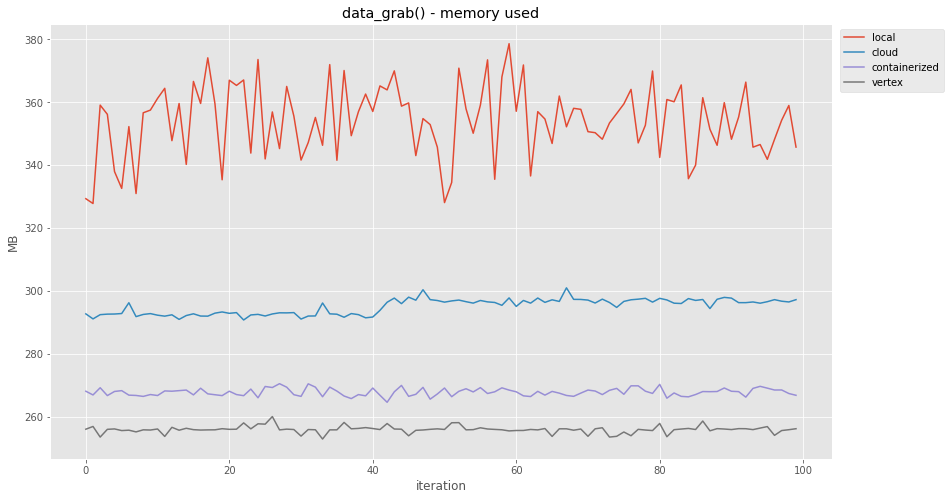

In [48]:
visualize('data_memory', 'data_grab() - memory used', 'MB')

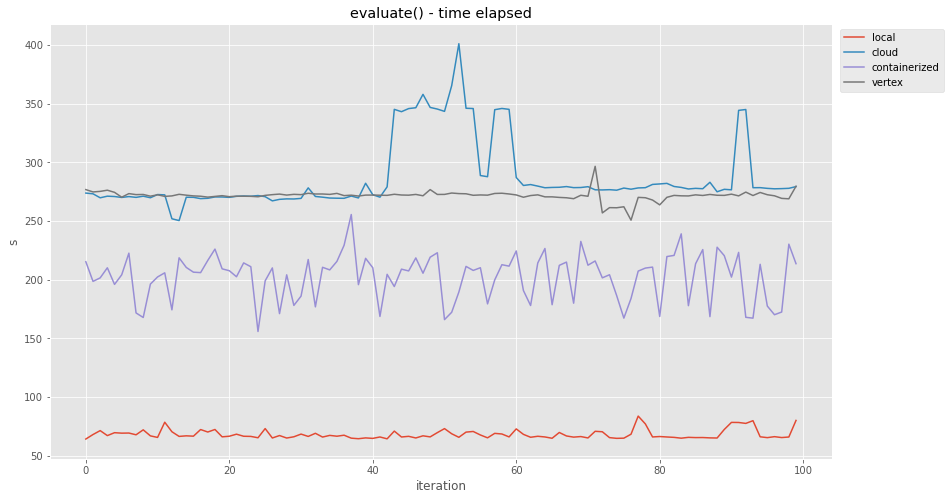

In [49]:
visualize('ml_time', 'evaluate() - time elapsed', 's')

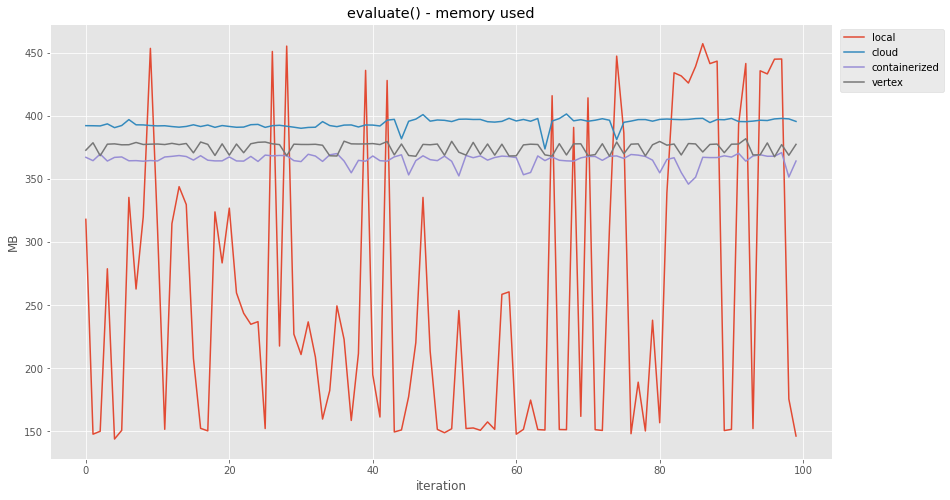

In [50]:
visualize('ml_memory', 'evaluate() - memory used', 'MB')

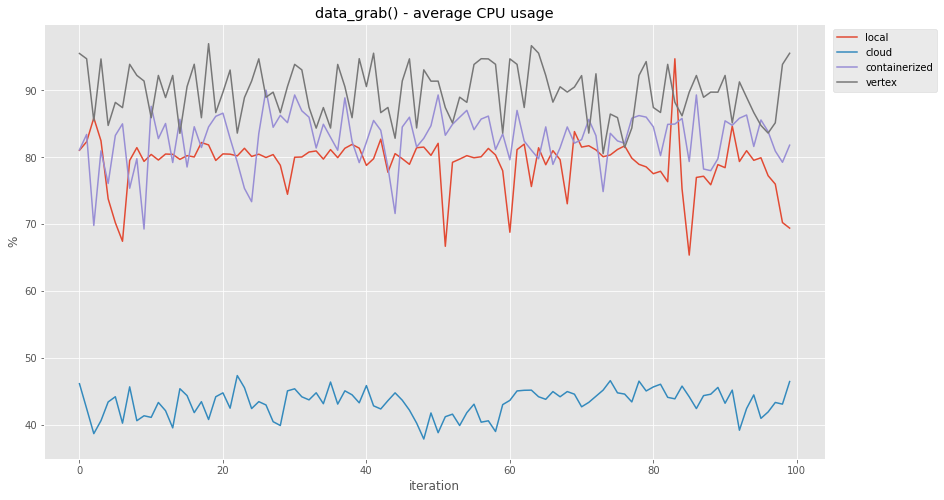

In [189]:
visualize('data_cpu_usage', 'data_grab() - average CPU usage', '%', cpu=True)

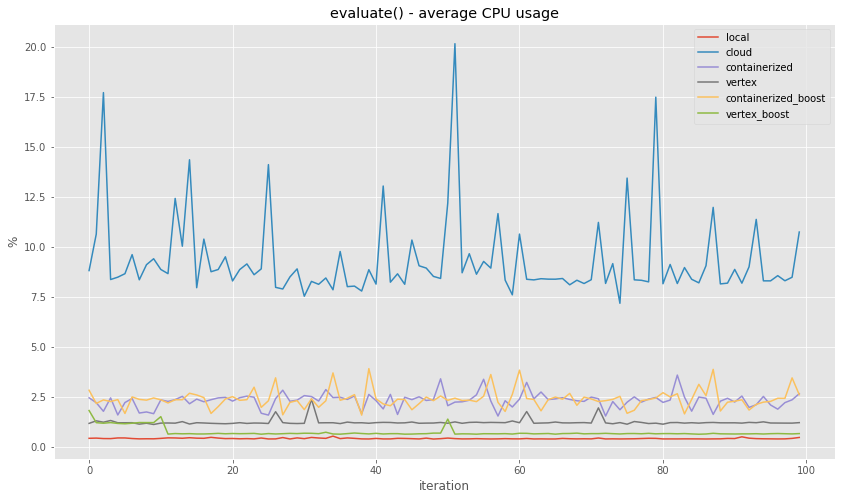

In [221]:
visualize('data_time', 'evaluate() - average CPU usage', '%', boost=True)

In [169]:
df_merged = pd.concat([df_local, df_cloud, df_containerized, df_vertex])
df_merged['deployment'] = df_merged.label.apply(lambda x: x.split('-')[0])


df_merged_cpu = pd.concat([df_local_cpu, df_cloud_cpu, df_containerized_cpu, df_vertex_cpu, df_containerized_cpu_boost, df_vertex_cpu_boost])
df_merged_cpu['deployment'] = df_merged_cpu.label.apply(lambda x: x.split('-')[0]+x[-6:] if x[-1]=='t' else x.split('-')[0])


In [170]:
df_merged_cpu

,label,data_cpu_usage,ml_cpu_usage,ts,index,deployment
0,local-2024-07-31 22:26:08.665528,81.040000,70.643860,2024-07-31,NaN,local
1,local-2024-07-31 22:42:02.539665,82.320000,71.997345,2024-07-31,NaN,local
2,local-2024-07-31 22:48:05.747672,85.880000,68.550000,2024-07-31,NaN,local
3,local-2024-07-31 22:50:59.576195,82.460000,68.332500,2024-07-31,NaN,local
4,local-2024-08-01 00:17:06.706333,73.783333,72.082301,2024-08-01,NaN,local
...,...,...,...,...,...,...
95,vertex-2024-08-18 02:03:11.194669-boost,86.828571,75.703646,2024-08-18,195.0,vertex-boost
96,vertex-2024-08-18 02:06:32.860474-boost,74.762500,76.694709,2024-08-18,196.0,vertex-boost
97,vertex-2024-08-18 02:09:52.690660-boost,89.685714,77.297312,2024-08-18,197.0,vertex-boost
98,vertex-2024-08-18 02:13:13.048996-boost,74.787500,78.516393,2024-08-18,198.0,vertex-boost


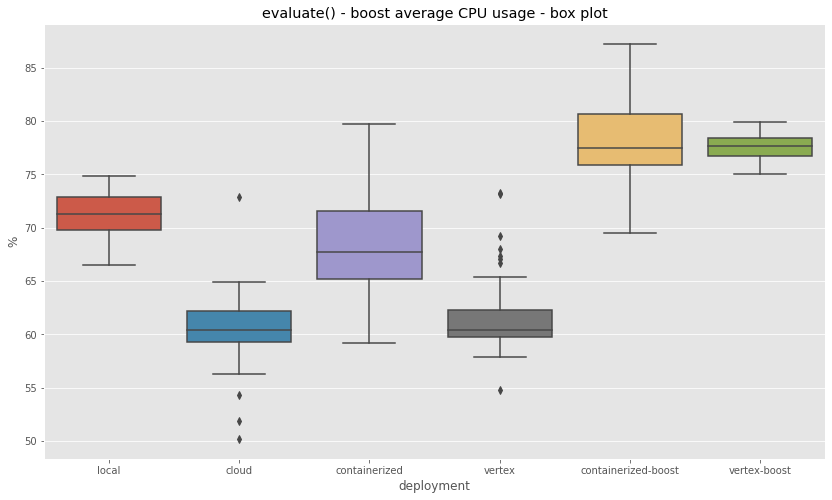

In [182]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df_merged_cpu, x='deployment', y='ml_cpu_usage').set(
    ylabel='%',
    title='evaluate() - boost average CPU usage - box plot');

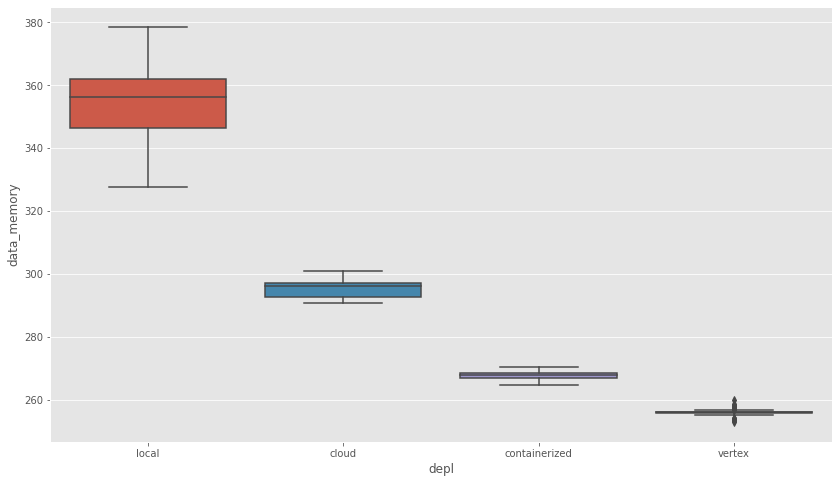

In [14]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df_merged, x='depl', y='data_memory');

In [217]:
def table(
    variable: str,
    index: list = ['local', 'cloud', 'containerized', 'vertex'],
    boost: bool = False
):
    a = df_local[variable].round(3).describe()
    b = df_cloud[variable].round(3).describe()
    c = df_containerized[variable].round(3).describe()
    d = df_vertex[variable].round(3).describe()
    if boost:
        e = df_containerized_boost[variable].round(3).describe()
        f = df_vertex_boost[variable].round(3).describe()
        index = ['local', 'cloud', 'containerized', 'vertex', 'containerized_boost', 'vertex_boost']
        out = pd.DataFrame([a,b,c,d,e,f])[['mean', 'std', 'min', '50%', 'max']]
        out.index = index
    else:
        out = pd.DataFrame([a,b,c,d])[['mean', 'std', 'min', '50%', 'max']]
        out.index = index
    print(tabulate(out, headers=['mean', 'std', 'min', '50%', 'max'], tablefmt='psql'))

def table_cpu(
    variable: str,
    index: list = ['local', 'cloud', 'containerized', 'vertex'],
    boost: bool = False
):
    a = df_local_cpu[variable].round(3).describe()
    b = df_cloud_cpu[variable].round(3).describe()
    c = df_containerized_cpu[variable].round(3).describe()
    d = df_vertex_cpu[variable].round(3).describe()
    if boost:
        e = df_containerized_cpu_boost[variable].round(3).describe()
        f = df_vertex_cpu_boost[variable].round(3).describe()
        index = ['local', 'cloud', 'containerized', 'vertex', 'containerized_boost', 'vertex_boost']
        out = pd.DataFrame([a,b,c,d,e,f])[['mean', 'std', 'min', '50%', 'max']]
        out.index = index
    else:
        out = pd.DataFrame([a,b,c,d])[['mean', 'std', 'min', '50%', 'max']]
        out.index = index

    print(tabulate(out, headers=['mean', 'std', 'min', '50%', 'max'], tablefmt='psql'))

In [104]:
table('ml_memory')

+---------------+---------+-----------+---------+---------+---------+
|               |    mean |       std |     min |     50% |     max |
|---------------+---------+-----------+---------+---------+---------|
| local         | 258.056 | 111.788   | 143.938 | 221.664 | 457.328 |
| cloud         | 394.435 |   3.81004 | 373.891 | 395.615 | 401.621 |
| containerized | 365.355 |   4.65817 | 345.977 | 366.994 | 370.957 |
| vertex        | 375.044 |   4.30279 | 367.672 | 377.461 | 382.008 |
+---------------+---------+-----------+---------+---------+---------+


In [105]:
table_cpu('ml_cpu_usage')

+---------------+---------+---------+--------+---------+--------+
|               |    mean |     std |    min |     50% |    max |
|---------------+---------+---------+--------+---------+--------|
| local         | 71.147  | 2.06469 | 66.464 | 71.2455 | 74.849 |
| cloud         | 60.5175 | 2.66202 | 50.174 | 60.413  | 72.845 |
| containerized | 68.5725 | 4.62308 | 59.151 | 67.703  | 79.725 |
| vertex        | 61.3646 | 2.87221 | 54.785 | 60.3965 | 73.306 |
+---------------+---------+---------+--------+---------+--------+


In [226]:
table('data_time', boost=True)

+---------------------+---------+-----------+-------+--------+--------+
|                     |    mean |       std |   min |    50% |    max |
|---------------------+---------+-----------+-------+--------+--------|
| local               | 0.39942 | 0.0251007 | 0.374 | 0.3925 |  0.519 |
| cloud               | 9.31848 | 2.13652   | 7.162 | 8.5675 | 20.145 |
| containerized       | 2.29771 | 0.370293  | 1.523 | 2.342  |  3.572 |
| vertex              | 1.21355 | 0.162179  | 1.101 | 1.1835 |  2.368 |
| containerized_boost | 2.3786  | 0.457551  | 1.57  | 2.343  |  3.895 |
| vertex_boost        | 0.71661 | 0.216591  | 0.614 | 0.6425 |  1.8   |
+---------------------+---------+-----------+-------+--------+--------+


In [201]:
df_cloud[df_cloud.ts >= '2024-08-10'].ml_memory.mean()

396.0022844827587

In [225]:
df_local[(df_local.index >= 50) & (df_local.ml_memory > 350)].shape

(18, 8)

In [246]:
test = df_local.merge(df_local_cpu, left_index=True, right_index=True).drop(['ts_x', 'ts_y', 'data_memory_inc', 'ml_memory_inc', 'label_x', 'label_y'], axis=1)
test

,data_time,data_memory,ml_time,ml_memory,data_cpu_usage,ml_cpu_usage
0,0.4099,329.3281,64.1414,318.0781,81.040000,70.643860
1,0.4198,327.7969,67.9818,147.7812,82.320000,71.997345
2,0.3977,359.0781,71.3132,150.0781,85.880000,68.550000
3,0.3946,356.1562,67.0607,278.9062,82.460000,68.332500
4,0.4282,337.9531,69.5474,143.9375,73.783333,72.082301
...,...,...,...,...,...,...
95,0.3822,341.8438,65.3333,433.3750,79.920000,73.539815
96,0.3779,348.1719,66.1598,445.0469,77.240000,68.983478
97,0.3818,354.2812,65.4008,445.1875,75.980000,68.668966
98,0.4057,358.9688,65.8616,175.6719,70.233333,66.463566


                data_time  data_memory   ml_time  ml_memory  data_cpu_usage  \
data_time        1.000000     0.056568  0.350463  -0.242025        0.020707   
data_memory      0.056568     1.000000 -0.079103   0.049888        0.197337   
ml_time          0.350463    -0.079103  1.000000  -0.357378       -0.040424   
ml_memory       -0.242025     0.049888 -0.357378   1.000000       -0.013738   
data_cpu_usage   0.020707     0.197337 -0.040424  -0.013738        1.000000   
ml_cpu_usage     0.080375     0.086059 -0.009996   0.128529       -0.156854   

                ml_cpu_usage  
data_time           0.080375  
data_memory         0.086059  
ml_time            -0.009996  
ml_memory           0.128529  
data_cpu_usage     -0.156854  
ml_cpu_usage        1.000000  
                data_time  data_memory   ml_time  ml_memory  data_cpu_usage  \
data_time        1.000000    -0.061517  0.098452  -0.007383       -0.195463   
data_memory     -0.061517     1.000000  0.469124   0.597579        0.00

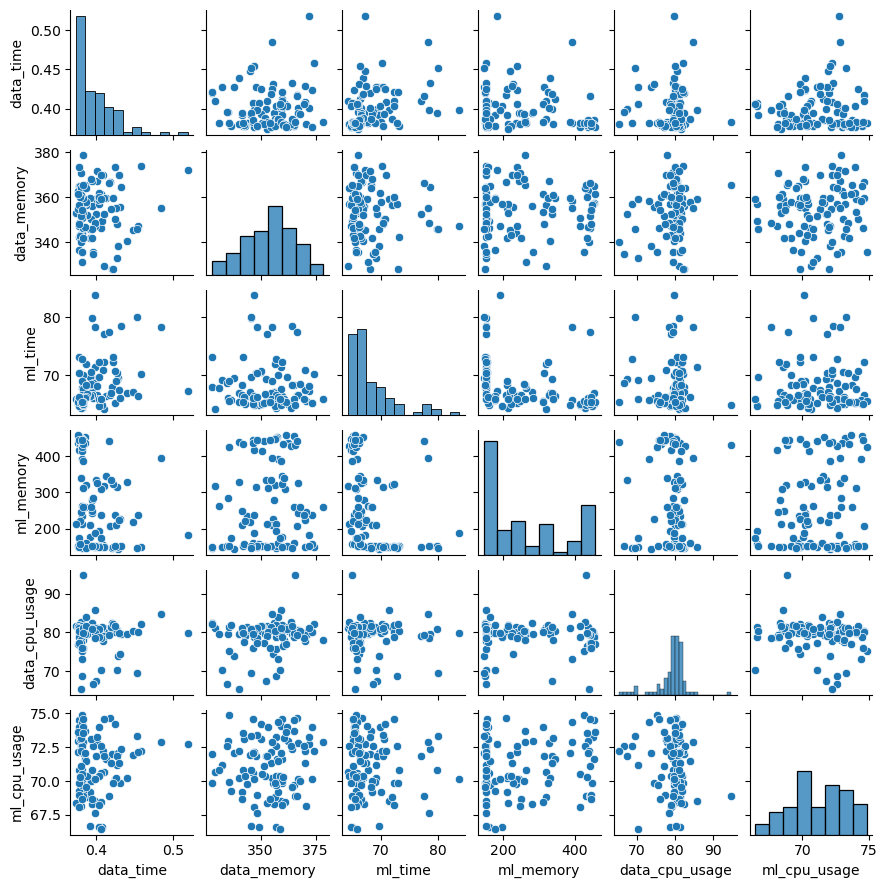

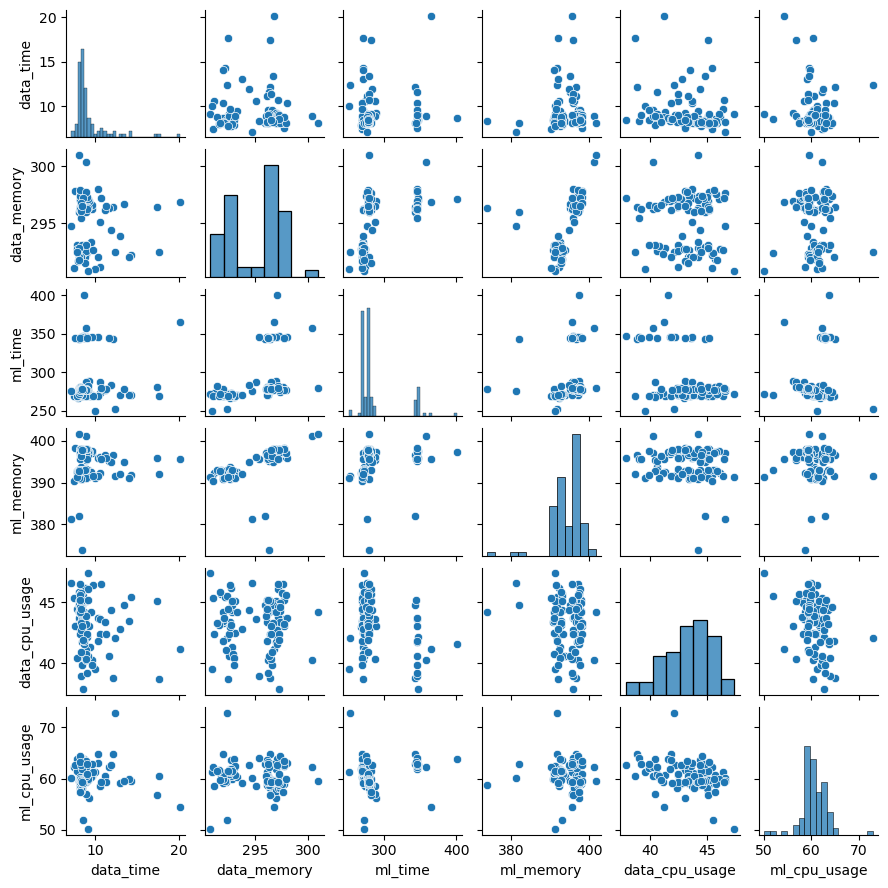

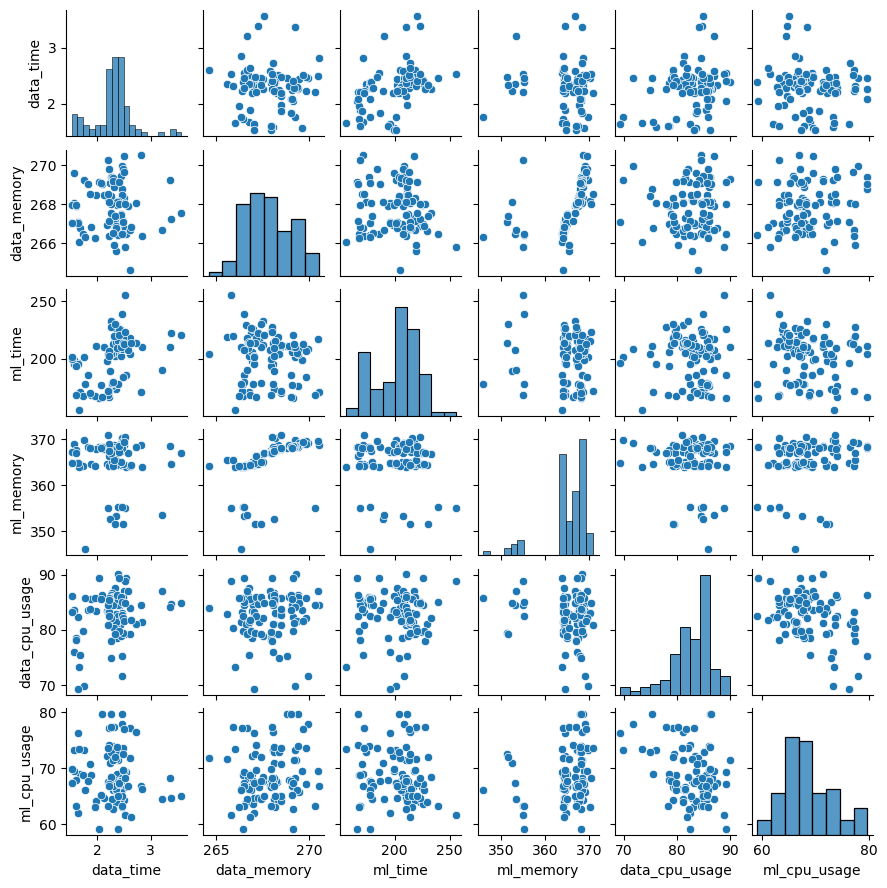

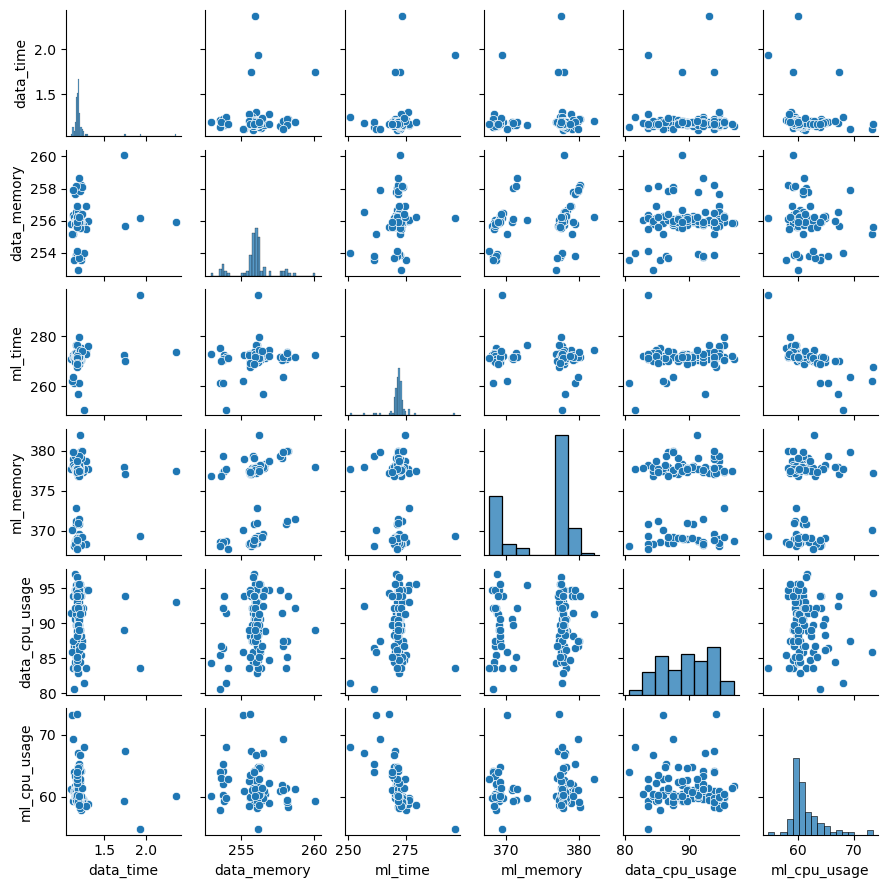

In [259]:
plt.style.use('default')

for df,df_ in zip([df_local, df_cloud, df_containerized, df_vertex], 
                [df_local_cpu, df_cloud_cpu, df_containerized_cpu, df_vertex_cpu]):
    df = df.merge(df_, left_index=True, right_index=True).drop(['ts_x', 'ts_y', 'data_memory_inc', 'ml_memory_inc', 'label_x', 'label_y'], axis=1)
    print(df.corr())
    sns.pairplot(df, height=1.5)
    plt.show()


In [257]:
df_local.corr(
)

,data_time,data_memory,data_memory_inc,ml_time,ml_memory,ml_memory_inc
data_time,1.000000,0.056568,0.038278,0.350463,-0.242025,-0.247807
data_memory,0.056568,1.000000,0.998571,-0.079103,0.049888,-0.052433
data_memory_inc,0.038278,0.998571,1.000000,-0.090061,0.057714,-0.044463
ml_time,0.350463,-0.079103,-0.090061,1.000000,-0.357378,-0.349226
ml_memory,-0.242025,0.049888,0.057714,-0.357378,1.000000,0.994765
ml_memory_inc,-0.247807,-0.052433,-0.044463,-0.349226,0.994765,1.000000


In [ ]:
df_containerized.